# Feynn Labs Project- Market Segmentation Analysis of the Electric Vehicle Market

# Importing libraries

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Importing Dataset

In [83]:
df = pd.read_excel('perf_eff.xlsx')

In [84]:
# Basic data exploration
print(df.head())

        Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla  Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   
3       360              206             560         Yes        RWD   
4       170              168             190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C  

In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB
None


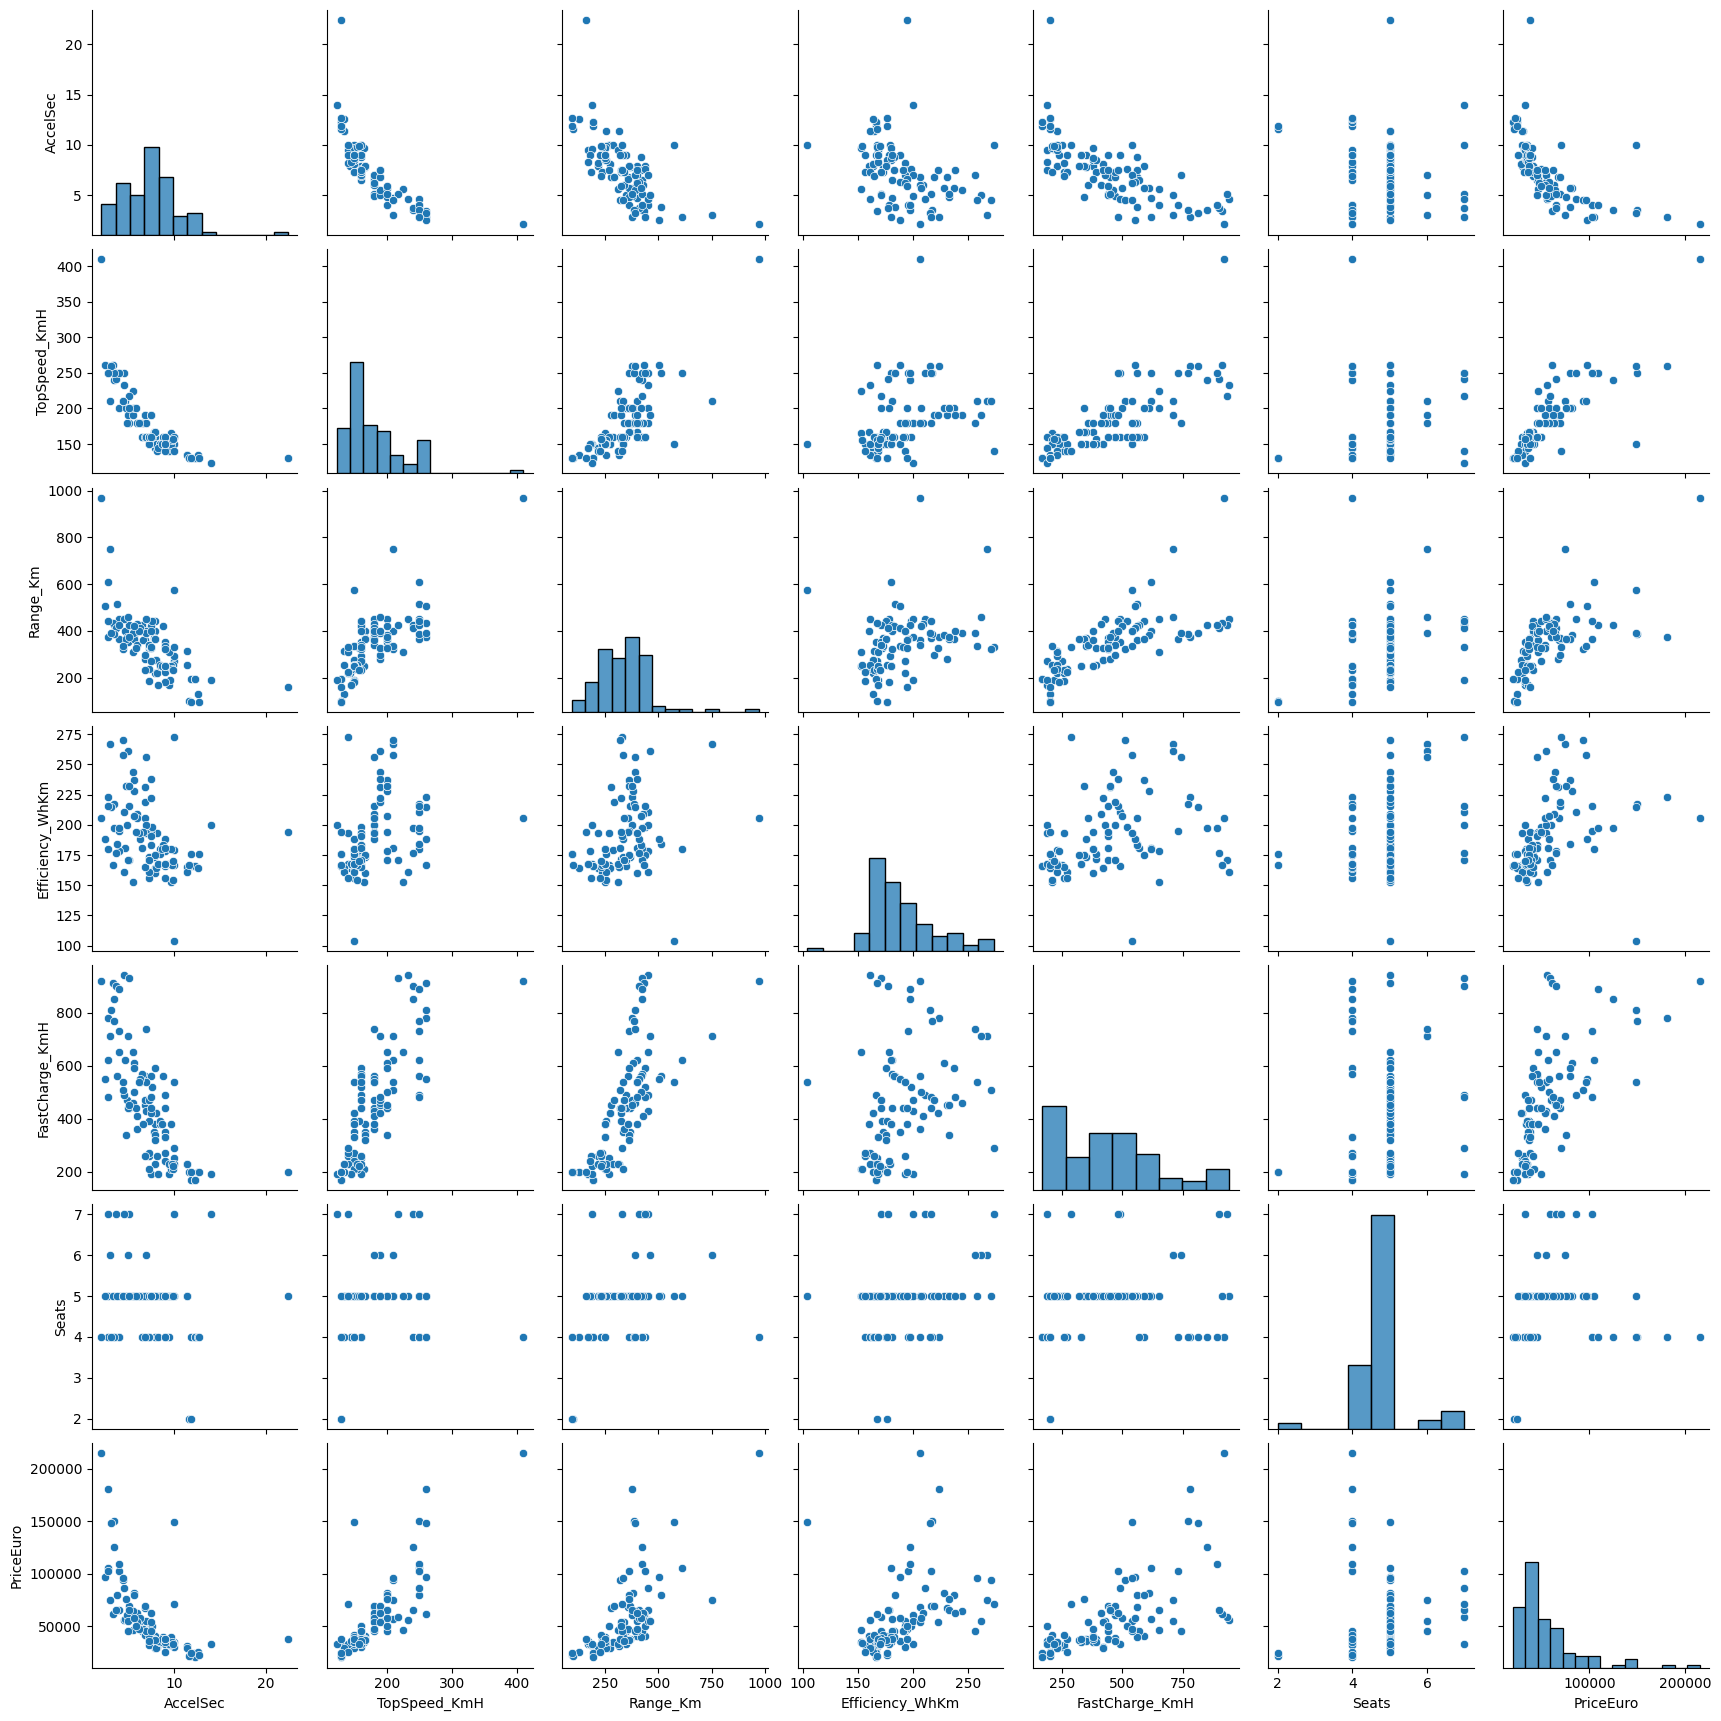

In [68]:
sns.pairplot(df)

# Analyzing the distribution of efficiency

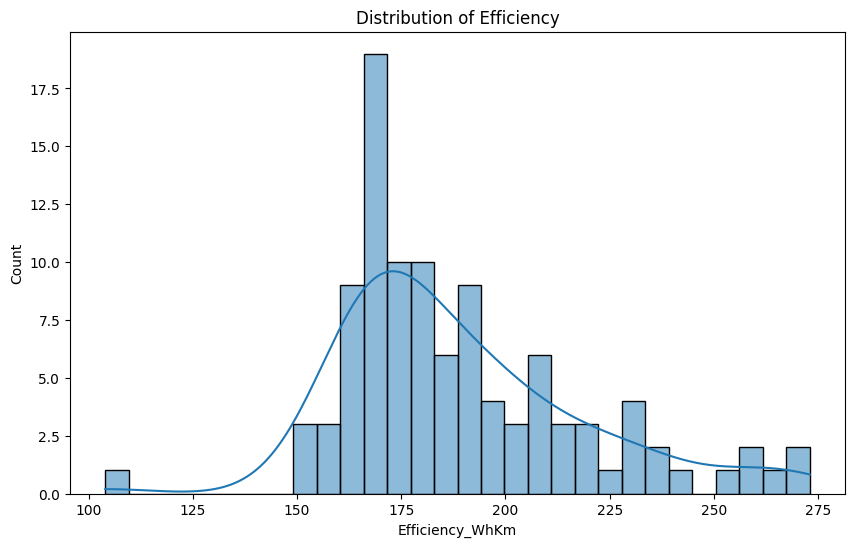

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Efficiency_WhKm'], bins=30, kde=True)
plt.title('Distribution of Efficiency')
plt.show()

# Analyzing the average efficiency by brand

In [70]:
brand_efficiency = df.groupby('Brand')['Efficiency_WhKm'].mean().sort_values(ascending=False)
print(brand_efficiency)

Brand
Byton         234.666667
Jaguar        232.000000
Audi          224.555556
Mercedes      220.000000
Porsche       209.400000
Ford          202.250000
Tesla         201.384615
Volvo         200.000000
Nissan        194.750000
Lexus         193.000000
MG            193.000000
Aiways        188.000000
Skoda         182.500000
CUPRA         181.000000
Polestar      181.000000
Lucid         180.000000
DS            180.000000
Citroen       180.000000
Mazda         178.000000
BMW           177.500000
Smart         173.000000
Kia           172.000000
Peugeot       172.000000
Opel          171.000000
Volkswagen    170.875000
Renault       170.400000
Fiat          168.000000
Honda         168.000000
SEAT          166.000000
Mini          156.000000
Sono          156.000000
Hyundai       155.666667
Lightyear     104.000000
Name: Efficiency_WhKm, dtype: float64


# Analyzing the relationship between acceleration and efficiency

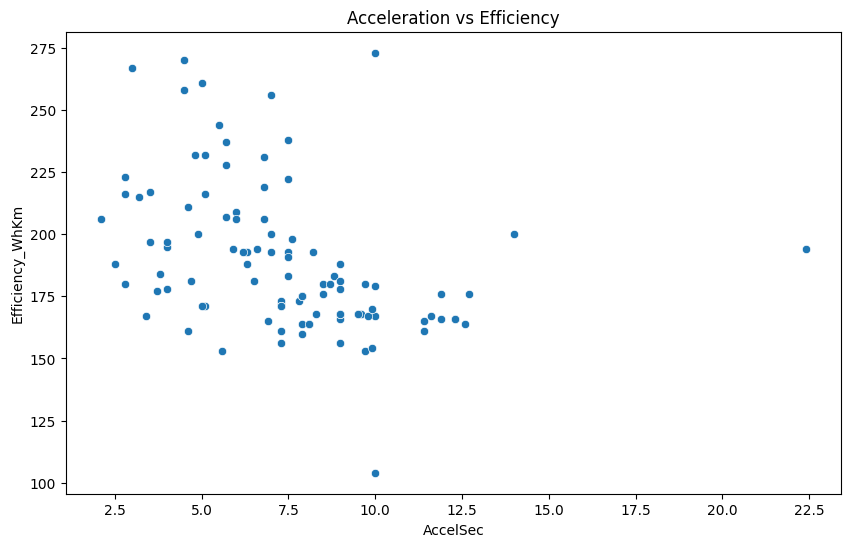

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccelSec', y='Efficiency_WhKm', data=df)
plt.title('Acceleration vs Efficiency')
plt.show()

# Analyzing the relationship between top speed and efficiency

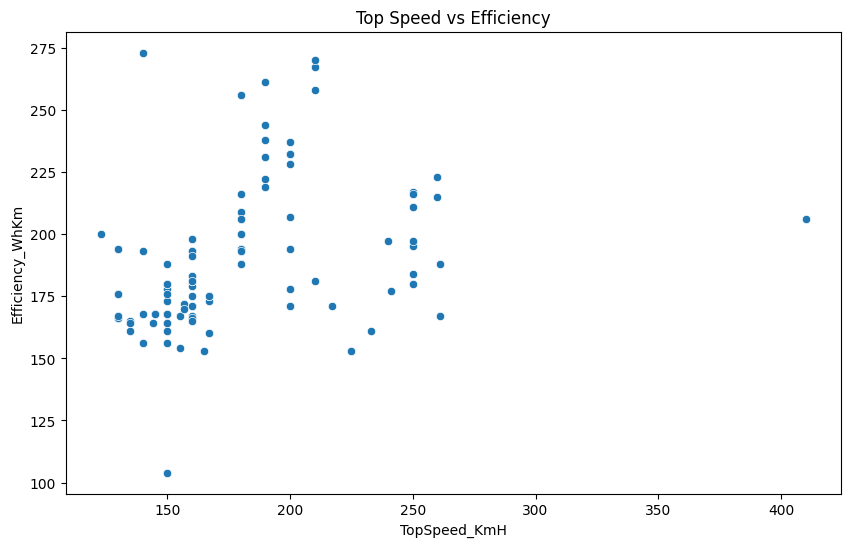

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df)
plt.title('Top Speed vs Efficiency')
plt.show()

# Analyzing the relationship between range and efficiency

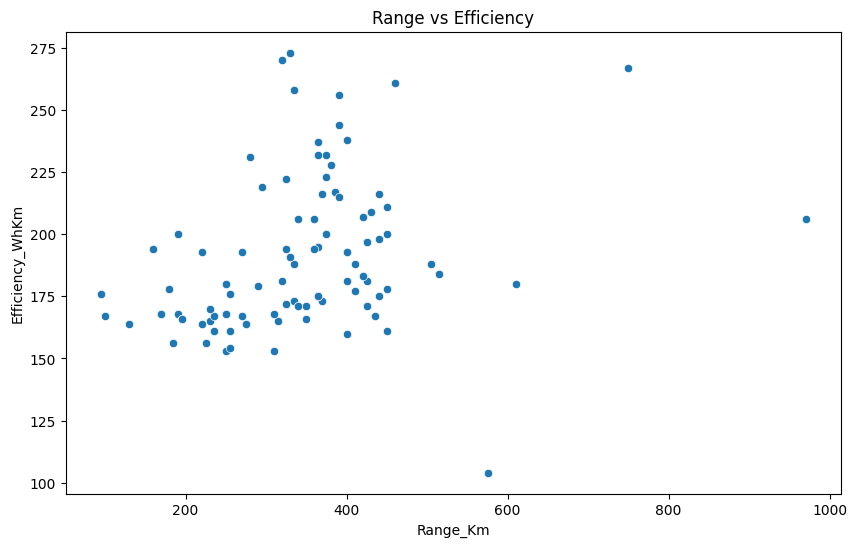

In [73]:
 plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range_Km', y='Efficiency_WhKm', data=df)
plt.title('Range vs Efficiency')
plt.show()

C:\Users\nimat\AppData\Local\Temp\ipykernel_14536\132667717.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='Brand', x='AccelSec', ci=None, palette='viridis')


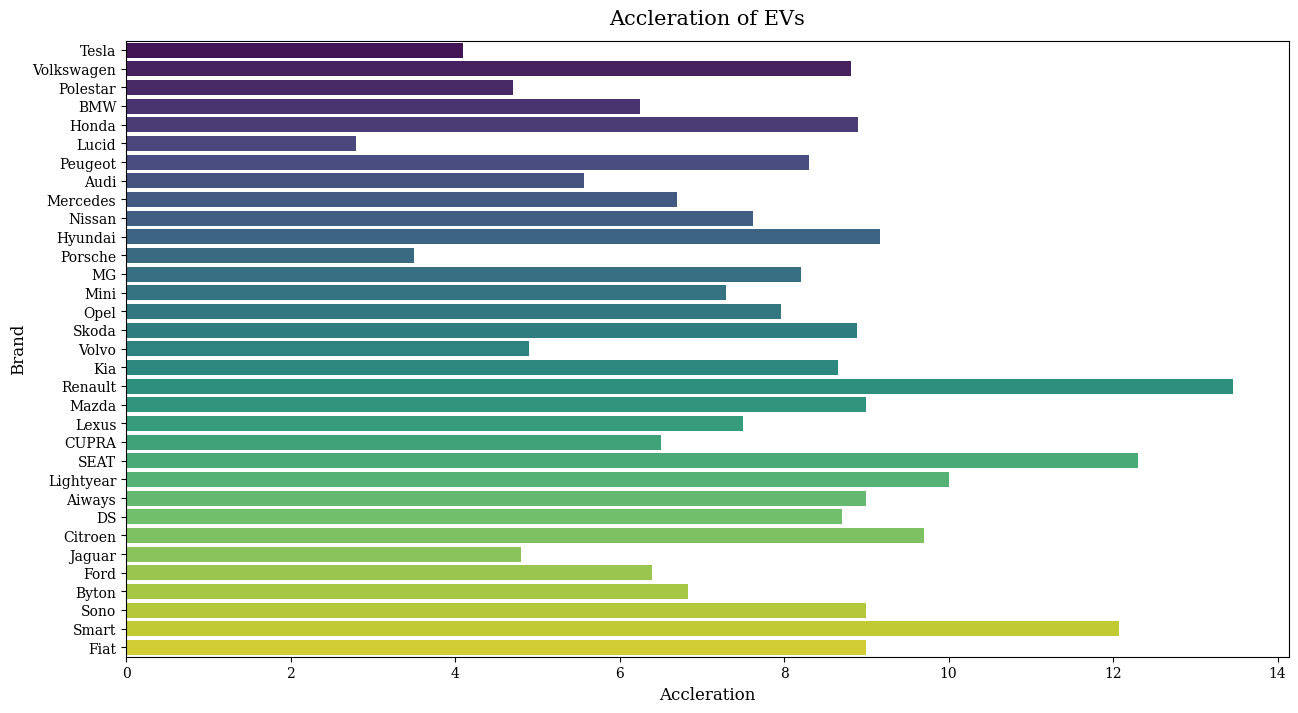

In [74]:
# accleration visualization from dataset 3
plt.figure(figsize=(15, 8))
sns.barplot(data=df, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs', family='serif', size=15, pad=12)
plt.show()

C:\Users\nimat\AppData\Local\Temp\ipykernel_14536\296833895.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='TopSpeed_KmH', ci=None, palette='viridis')


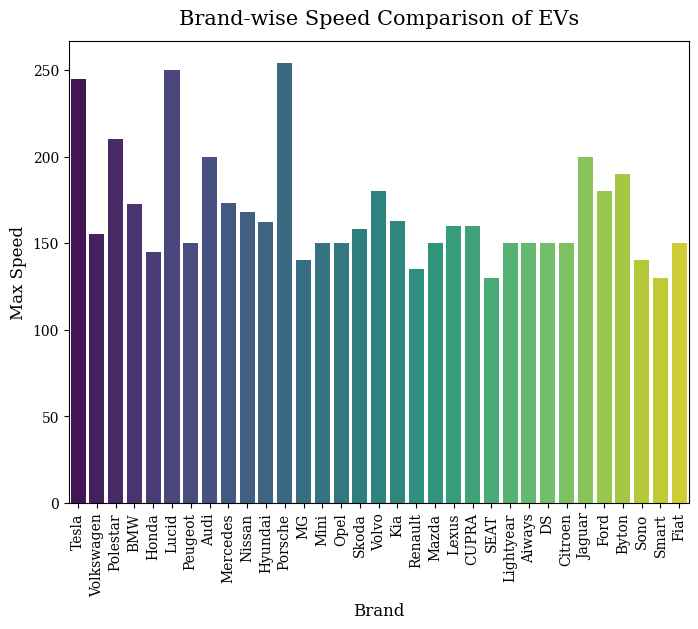

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Brand', y='TopSpeed_KmH', ci=None, palette='viridis')
plt.xticks(rotation=90, family='serif')  # rotation parameter added to rotate x-axis labels
plt.yticks(family='serif')
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Max Speed', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs', family='serif', size=15, pad=12)
plt.show()


C:\Users\nimat\AppData\Local\Temp\ipykernel_14536\1706229378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


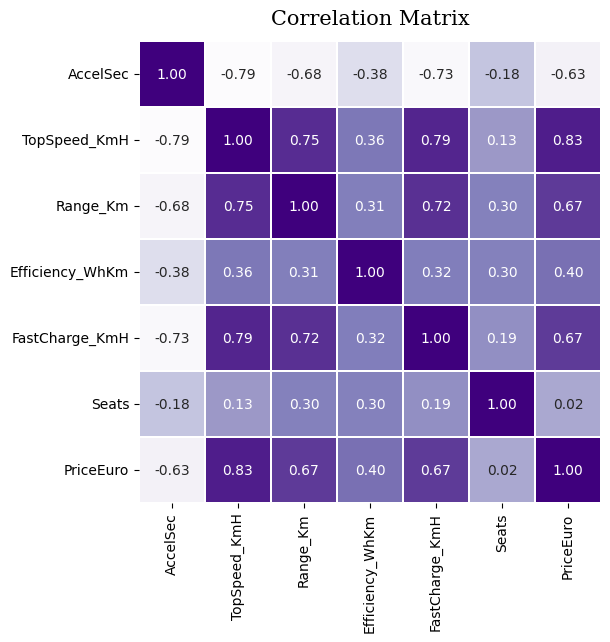

In [76]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

# Regression Tree

In [77]:
def tree_reg(data,columns_x,column_y):
    global y_test_tr
    global X_test_tr
    reg=DecisionTreeRegressor(random_state=1)
    X=data[columns_x]
    Y=data[column_y]
    X_train,X_test_tr,y_train,y_test_tr=train_test_split(X,Y,random_state=1)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test_tr)
    mse=mean_squared_error(y_test_tr,y_pred)
    
    
    return y_pred,mse



In [78]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [92]:
columns_x=['AccelSec']
column_y='Efficiency_WhKm'

In [95]:
y_pred_tr,mse_tr=tree_reg(df,columns_x,column_y)

In [96]:
def plot_graph(y_pred):
    sns.scatterplot(x=X_test_tr['AccelSec'],y=y_test_tr)
    sns.scatterplot(x=X_test_tr['AccelSec'],y=y_pred)
    plt.show()

In [97]:
def plot_difference(y_pred):
    sns.scatterplot(x=X_test_tr['AccelSec'],y=y_test_tr-y_pred)
    plt.show()

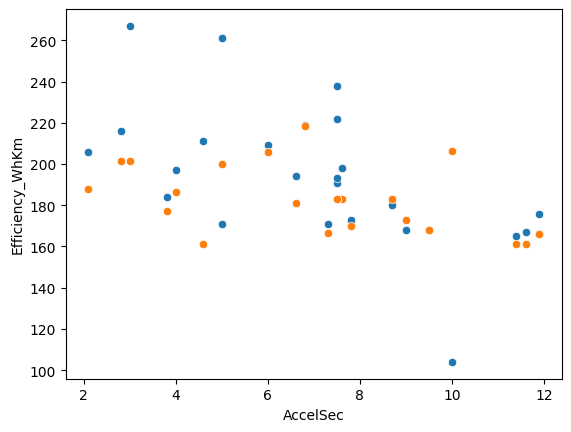

In [98]:
plot_graph(y_pred_tr)

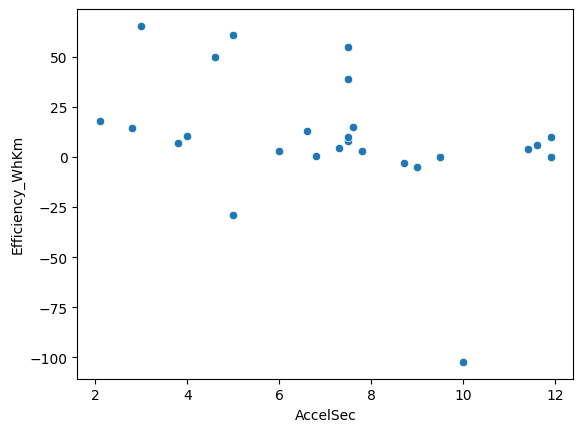

In [99]:
plot_difference(y_pred_tr)

# Random Forest Regressor

In [100]:
def rf_reg(data,columns_x,column_y):
    global y_test_rf
    global X_test_rf
    reg=RandomForestRegressor(random_state=1)
    X=data[columns_x]
    Y=data[column_y]
    X_train,X_test_rf,y_train,y_test_rf=train_test_split(X,Y,random_state=1)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test_rf)
    mse=mean_squared_error(y_test_rf,y_pred)
    
    
    return y_pred,mse

In [101]:
y_pred_rf,mse_rf=rf_reg(df,columns_x,column_y)

In [102]:
def plot_graph_rf(y_pred):
    sns.scatterplot(x=X_test_tr['AccelSec'],y=y_test_tr)
    sns.scatterplot(x=X_test_tr['AccelSec'],y=y_pred)
    plt.show()

In [103]:
def plot_difference_rf(y_pred):
    sns.scatterplot(x=X_test_tr['AccelSec'],y=y_test_tr-y_pred)
    plt.show()

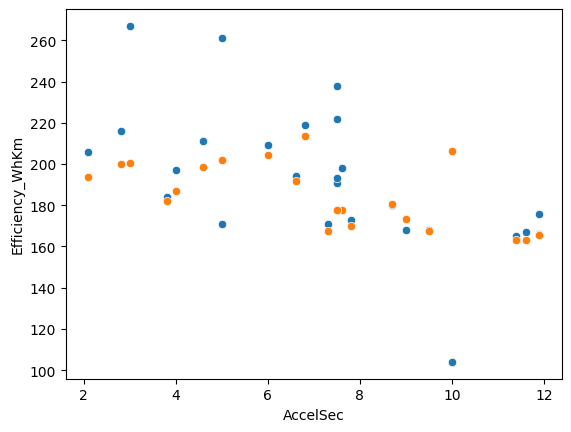

In [104]:
plot_graph_rf(y_pred_rf)

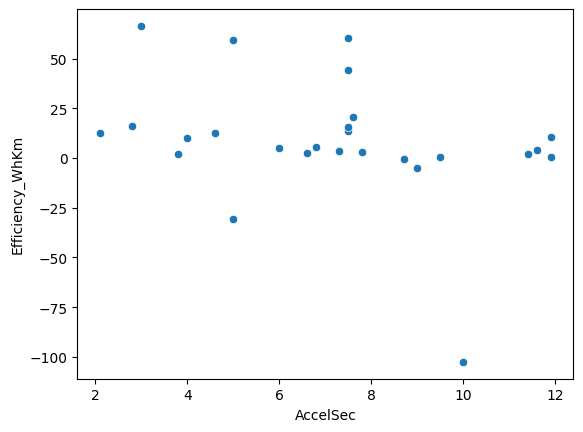

In [105]:
plot_difference_rf(y_pred_rf)